Neural Networks | Joseph Sako

In [1]:
# Imports ...

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt

In [2]:
# Load the dataset ...

df = pd.read_csv('iris.data', header = None)

In [3]:
# Select the features and target variable ...

X = df.iloc[:, [2, 3]].values
y = df.iloc[:, 4].values

In [4]:
# Encode the target variable as integers ...

target_dict = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
y = np.array([target_dict[label] for label in y])

In [5]:
# Split the dataset into a training set and a test set ...

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [6]:
# Create an instance of the Perceptron class ...

ppn = Perceptron(max_iter = 100, eta0 = 0.1, random_state = 1)

In [7]:
# Train the model on the training set ...

ppn.fit(X_train, y_train)

Perceptron(eta0=0.1, max_iter=100, random_state=1)

In [8]:
# Test the accuracy of the model on the test set ...

accuracy = ppn.score(X_test, y_test)
print(f'A c c u r a c y   :   {accuracy:.2f}')

A c c u r a c y   :   0.71


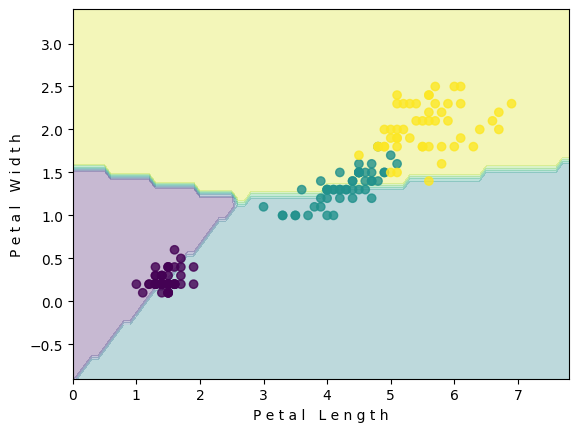

In [9]:
# Define a meshgrid ...

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict the class labels for the points in the meshgrid ...

Z = ppn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the data points ...

plt.contourf(xx, yy, Z, alpha = 0.3)
plt.scatter(X[:, 0], X[:, 1], c = y, alpha = 0.8)
plt.xlabel('P e t a l   L e n g t h')
plt.ylabel('P e t a l   W i d t h')
plt.show()